
# Resolución de Ecuaciones Diferenciales Ordinarias utilizando Integración Monte Carlo

### Dehesa Corona Valeria Carolina
### Proyecto final para la materia de Análisis Numérico

  



# Abstract

A linear differential equation is a differential equation that is defined by a linear polynomial in the unknown function and its derivatives. An initial value problem or ivp is an ordinary differential equation together with an initial condition which specifies the value of the unknown function at a given point in the domain. The present work aims to establish an implementation to solve these initial value problems using Monte Carlo methods for integration. This will be approached by using an important lemma that allows us to tranform an initial value problem to an equation involving an integral. Finally we´ll conclude that, because of its easy implementation it is a valid option for these type of problems.

#Objetivos
Presentar los resultados que permiten el uso de Método Monte Carlo para aproximación de integrales, establecer mediante el Método Monte Carlo un método de solución de problemas de valor inicial y finalmente concluir si vale la pena este acercamiento para resolverlos

# Introducción



El método Monte Carlo aunque computacionalmente "caro", resulta relativamente sencillo de implementar y es ampliamente utilizado en el ámbito de la investigación. Por ello, es de mi interés en el presente trabajo establecer un método mediante Integración Monte Carlo para resolver problemas de valor inicial y comprobar su eficacia.

Los problemas de valor inicial de ecuaciones diferenciales pueden ser resueltos pasándolos a ecuaciones con integrales. A veces resulta difícil (o hasta imposible) resolver una integral mediante métodos analíticos, por lo que los métodos numéricos llegan a facilitar este paso con un costo de error que varía dependiendo del método.

Los métodos Monte Carlo son algoritmos basados en muestreos aleatorios para obtener resutados numéricos. A pesar de que los muestreos aleatorios son sumamente complejos para obtener en la realidad, actualmente mediante computadoras se han construido métodos generadores de números pseudoaleatorios que han facilitado el proceso.





#Marco Teórico

## Historia Método Monte Carlo

Podríamos decir que los creadores del Método Monte Carlo fueron Stanislaw Ulam y John Von Neumann. A pesar de que la idea fue creada por Ulam, fue Von Neumann quien reconoció el potencial de la implementación. 

Ulam tenía una fascinación con los procesos estocásticos, tenía como pasatiempo los juegos de azar y disfrutaba de jugar solitario. Conocía bien métodos estadísticos que se basaban en muestreos aleatorios y los consideraba tediosos por la cantidad de operaciones necesarias para su uso. Un día de convalecencia, Ulam tuvo la idea de calcular la probabilidad de ganar un "Canfield" (juego de solitario con probabilidades bajas de ganar) y al fallar intentando resolver el problema por combinatoria, se le ocurrió la idea acomodar las cartas cientos de veces y contar cuantas salían exitosas. 

En la primavera de 1946,  John William Mauchly y John Presper Eckert invitaron a un grupo de renombrados científicos a conocer la computadora ENIAC ( Electronic Numerical Integrator And Computer), entre ellos estaban Ulam y Von Neumann. Entusiasmado con el potencial de la ENIAC, Ulam le platicó a Neumann sus ideas y juntos formularon un posible acercamiento a un problema termonuclear que se trabajó desde el proyecto Manhattan, el proyecto que diseñó y construyó las primeras armas nucleares.

En 1947, John Von Neumann envío una carta a Robert Richtmyer,líder de la división teórica del Laboratorio Alamos donde explicaba un posible acercamiento estadístico al problema de la difusión de neutrones en material fisionable.

Básicamente, Neumann y Ulam proponían considerar un núcleo esférico de material fisionable rodeado de un "caparazón" de material maleable. Asumiendo una distribución inicial de neutrones  en espacio y velocidad pero ignorando los efectos radiativos e hidrodinámicos. La idea era seguir el desarrollo de un largo número de cadenas de neutrones individuales como una consecuencia de
dispersión, absorción, y fisión.

Después de recibir la respuesta, Neumann y Ulam volvieron a la ENIAC (ahora en su nuevo hogar: Maryland) y comenzaron a programar. Esta investigación fue utilizada para la creación de la Bomba de hidrógeno o Bomba H. Un arma nuclear de segunda generación; más compacta, liviana y más destructiva.

En cuanto a su contexto histórico,  resulta irónico pensar en la enorme cantidad de avances científicos que, aunque ahora ayudan a construir un mejor futuro para la humanidad, surgieron motivados por objetivos que el día de hoy consideraríamos inmorales. Sin duda, aquellos que trabajaron en el proyecto Manhattan eran destacables como científicos(algunos son recordados como genios), aunque la historia ha puesto en duda su calidad moral. 

Una anécdota no tan conocida es que en 1945, Leo Szilard y otros 70 científicos del proyecto Manhattan presentaron la "Szilárd petition", una carta dirigida al presidente Truman pidiéndole presentar sus términos a Japón y advirtiendo de su intención de utilizar la bomba en caso de no rendición. La carta nunca llegó al presidente Truman y la bomba llegó a Hiroshima el 6 de agosto de 1945, 9 días antes de la rendición oficial de Japón.

"If you say why not bomb [the Soviets] tomorrow, I say, why not today. If you say today at five o'clock, I say why not one o'clock?" -John Von Neumann.

## Problemas de Valor Inicial

Tomaremos las EDO de la siguiente forma:

$$\frac{dx}{dt} = f(t,x(t))$$

tal que $x(t_0)=x_0$ valor inicial de la ecuación. 

Esta forma de ecuación diferencial ordinaria es conocida como "problema de valor inicial".

Un lema interesante que será revisado aquí, es que siempre podemos convertir una ecuación diferencial de primer orden en la siguiente ecuación:

$$x(t) = x_0 + \int_{t_0}^{t} f(s,x(s))ds$$

Que convierte el problema en un problema de integración. La implementación de la regla de Simpson para resolver esta  ecuación resulta en las ecuaciones Runge-Kutta de cuarto orden. Los métodos Runge-Kutta, así como el método de Euler son tradicionalmente utilizados para resolver estos problemas de valor inicial.


## Soluciones de Ecuaciones Diferenciales Ordinarias de primer orden

Para garantizar la existencia de una solución para la ecuación diferencial ordinaria, uno asume que $f$ es continua en el dominio sobre el cual se quiere resolver la ecuación. Para la unicidad de dicha solución $f$ debe cumplir con la condición de Lipschitz, que nos dice:

La función $f : X \rightarrow \mathbb{R}$ es Lipschitz continua si existe un valor $K$ tal que $|f(x)-f(y)| \leq K||x-y||$ para toda $x,y \in X$.

Esta condición es más fuerte que la de continuidad. Una función que es diferenciable en todo su dominio es Lipschitz continua si su primera derivada está acotada y toda función continuamente diferenciable es Lipschitz localmente ya que toda función continua es localmente acotada.

La razón por la cual es llamada de "primer orden" yace en que sólo ya primera derivada de $y$ está en la ecuación.

###Lema
Tenemos un $I \subset \mathbb{R}$ que es un intervalo abierto con $t_o \in I$, donde $D \subset \mathbb{R} \times \mathbb{R}^n $ conjunto abierto, $f: D \rightarrow \mathbb{R}^n $ función continua que satisface $(t,x(t)) \in D, \forall t \in I$. Entonces existe una solución al problema de valor inicial si y sólo si:

$$x(t) = x_0 + \int_{t_0}^{t} f(s,x(s))ds$$

$\underline{Dem}$. Si $x(t)$ solución al problema de valor inicial, entonces es una antiderivada de $f(t,x(t))$ en $I$ y por Teorema fundamental del Cálculo:

$$x(t) - x(t_0) = \int_{t_0}^{t} f(s,x(s))ds$$

Como $x(t_0)=x_0$ obtenemos la ecuación del lema.



## Integración Monte Carlo
Antes de revisar la técnica mediante la cual se integra utilizando el método Monte Carlo, revisaremos los conceptos y resultados que hacen posible su uso.
###Conceptos útiles
**Variable aleatoria**
Una variable aleatoria es la cantidad resultante de una función asociada a algún experimento que involucra azar. Por ejemplo, tirando dos dados podríamos tomar como v. a el número que salga y  $E_m = \{ 1 , 2, 3, 4, 5, 6\}$ es su espacio muestral.

**Distribución de probabilidad** La distribución de probabilidad de una variable aleatoria es una función que asigna a cada suceso definido sobre la variable la probabilidad de que dicho suceso ocurra.

**Esperanza** La esperana es el valor medio o esperado de una distribución. $\mathbb{E}[X] = \int_{-\infty}^{\infty} xf(x)dx$ en el caso continuo y $\mathbb{E}[X]= \sum_{i}^{i}x_if\left(X_{i}\right)$ en el caso discreto.

**Varianza** La varianza de $X$ es la medida de dispersión de la distribución. $var(X) = \mathbb{E}[X^2]- (\mathbb{E}[X])^2$

**Distribución Uniforme**
Para este proyecto solo necesitamos saber que la distribución uniforme continua es una familia de distribuciones de probabilidad para variables aleatorias continuas, tales que para cada miembro de la familia, todos los intervalos de igual longitud en la distribución en su rango son igualmente probables. La escribiremos como $\sim \mathbb{U}_(a,b)$ donde $a, b$ extremos del intervalo.

**Distribución Normal**
La distribución Normal es  una de las distribuciones de probabilidad de variable continua que con más frecuencia aparece en estadística y en la teoría de probabilidades. La gráfica de su función de densidad tiene una forma acampanada y es simétrica respecto de un determinado parámetro estadístico. Esta curva se conoce como campana de Gauss y es el gráfico de una función gaussiana.



###Teoremas importantes

Para poder continuar con el desarrollo del proyecto y cumplir el objetivo, primero revisaremos los teoremas que hacen esto posible. Los teoremas ahondan en los conceptos de probabilidad revisados anteriormente.
####**Ley de los grandes números**
El promedio de $M$ variables aleatorias independientes e idénticamente distribuidas $x_i$, $\bar{X}_M = \frac{1}{M}\sum_{i=1}^{M} x_i$, converge a $\mathbb{E}[X]$ cuando M es suficientemente grande. Es decir,

$$\mathbb{P} (\lim_{M\to\infty} \bar{X}_M = \mathbb{E}[X]) = 1$$
La probabilidad de que el límite de $\bar{X}_M$ con M muy grande sea igual a la esperanza de de $X$ es 1. Esto porque tenemos la posibilidad de que el muestreo  sea tal que el promedio no sea igual a la esperanza, pero conforme M se hace grande. la probabilidad de que esto ocurra tiende a 0.

####**Teorema fundamental de Monte Carlo**
Consideremos la variable aleatoria $G_{N}$, promedio de una función $g\left(X_{i}\right)$ con $x_i$ independientes e idénticamente distribuidas, es decir 

$$G_{N}=\frac{1}{N}\sum_{i=1}^{N}g\left(X_{i}\right) \tag{1}$$

Cuya esperanza y varianza son respectivamente

$$\mathbb{E}[G_N]=\mathbb{E}[g(X)],var(G_N)=\frac{var(g(X))}{N}\tag{2}$$

Al promedio $G_N$ se le llama estimador de $\mathbb{E}[g(X)]$, pues su esperanza vale:

$$\mathbb{E}[G_N]=\mathbb{E}[g(X)]=\int_{-\infty}^{\infty}g(x)f(x)dx\tag{3}$$

Donde $X_i\sim f$. Es decir que podemos evaluar la integral anterior generando un conjunto de $N$ variables aleatorias $X_{i}$ según $f(x)$ y evaluando $g(x)$ para cada una de ellas. 

El estimador (1) (la media aritmética de los $g(x)$ generados) nos da el valor de la integral (3). 

Ademas podemos ver que la varianza del estimador disminuye al crecer $N$. De hecho, aplicando la desigualdad de Chebyshev a la variable aleatoria $G_N$ con $\sigma^{2}=var(G_N),\,x^{2}=\frac{\sigma^{2}}{\delta}\,y\,\delta>0$,

$$P(|G_N-\mathbb{E}[G_N]|\geq[\frac{var(G_N)}{\delta}]^{\frac{1}{2}})\leq\delta \tag{4}$$

Lo que significa que generando una muestra suficientemente grande $(N >> \frac{1}{\delta})$ la probabilidad de que el estimador se aleje del valor esperado $g(X)$ es tan pequeña como se desee.

####**Teorema del límite Central**
Si la variable aleatoria $G_N$ toma valores $g_N$ y definimos:

$$t_N = \frac{g_N-\mathbb{E}[g(X)]}{\sqrt{var(G_N)}} = \frac{g_N- \mathbb{E}[g(X)]}{\sqrt{var(g(X))}/\sqrt{N}}$$

El teorema del límite central establece que:

$$\lim_{N\to\infty}\mathbb{P}(a<t_N<b)=\int_{a}^{b} \frac{e^{-\frac{t^2}{2}}}{\sqrt{2\pi}}dt\tag{1}$$

Que nos dice que cuando N es lo suficientemente grande, los valores de $G_N$ tienen una distribución Normal de media $\mu = \mathbb{E}[g(X)]$ y varianza $\sigma ^2 = var(g(X))$. 

Una vez considerados los anteriores teoremas, notamos que se concentran en la noción de que el muestreo aleatorio que tomaremos para la integración Monte Carlo se puede aproximar tanto como queramos pero tendremos que hacer muestreos lo suficientemente grandes y también considerar un gran número de iteraciones. Esto podría conllevar un alto costo computacional.



Ahora revisaremos la técnica que utilizaremos para implementar el método Monte Carlo en la resolución de la integral que representa el IVP(Initial Value Problem) de la EDO de  primer orden.



###Técnica de integración Monte Carlo

## Métodos Monte Carlo

La integral de la función es igual al área debajo de la curva. La longitud del intervalo $b-a$ por el valor promedio de la función, es decir:

$$I = \int_{a}^{b} f(x)dx = (b-a) f_{promedio} = (b-a)<f> $$

Entonces buscamos una manera de calcular el valor promedio de la función a integrar. Aquí es donde los números aleatorios nos serán útiles. Para encontrar el valor promedio de la función en el intervalo $[a,b]$, primero tomaremos $M$ variables aleatorias $x_i$ uniformemente distribuidas entre $a$ y $b$. Después evaluaremos $f(x_i)$ para todas las muestras tomadas y obtendremos su promedio:

$$<f>_M = \frac{1}{M}\sum_{i=1}^{M} f(x_i)$$

Tenemos que el valor promedio de éstas evaluaciones se aproximara cada vez más a $<f>$ conforme $M \rightarrow \infty$. Por lo que obtenemos la siguiente expresión, también conocida como el estimador básico Monte Carlo:

$$\int_{a}^{b} f(x)dx = \frac{(b-a)}{M}\sum_{i=1}^{M} f(x_i) $$









Vamos a visualizar el teorema del límite central con la integración Monte Carlo

**Bibliotecas Adicionales:**

In [1]:
%matplotlib inline

import numpy as np
from scipy import random
from typing import Tuple,Callable
from scipy.integrate import quadrature, odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Primero vamos a visualizar la distribución de los promedios de una función generados por el método Monte Carlo con ayuda de un histograma. Lo haremos con el ejemplo siguiente:

$$\int_{0}^{\pi} sin(x)dx = -cos(\pi) - (-cos(0)) = -(-1)-(-1) = 2$$

In [2]:
def func(x): #Hacemos nuestra función a integrar
        return np.sin(x)

dom = [0,np.pi]#Intervalo predeterminado

def MonteCarlo_int(func,N,dominio = dom):
  """
    :param func: función a integrar
    :param N: tamaño de muestra
    :param dominio: arreglo con extremos del intervalo a integrar guardados
  """
    
  xrand= np.zeros(N) #Inicializamos arreglos que contendrán nuestros puntos aleatorios
    
  for i in range(N): #Llenamos los arreglos con el debido dominio
    xrand[i] = random.uniform(dominio[0],dominio[1])
    
  integral = 0.0 #Inicializamos variable para resultado
    
  for i in range (N):
    integral += func(xrand[i]) #Evaluamos la función en los puntos aleatorios

  ans = integral/N #Dividimos entre el número de iteraciones para encontrar el promedio
    
  #Finalmente multiplicamos por el área de dominio
    
  return ans*(dominio[1]-dominio[0])



(array([ 1.,  2.,  3.,  5.,  3., 13., 16., 17., 19., 38., 50., 46., 66.,
        72., 72., 80., 81., 69., 68., 49., 61., 52., 33., 24., 25., 13.,
         5.,  6.,  4.,  7.]),
 array([1.90403277, 1.91005197, 1.91607116, 1.92209035, 1.92810955,
        1.93412874, 1.94014794, 1.94616713, 1.95218633, 1.95820552,
        1.96422472, 1.97024391, 1.97626311, 1.9822823 , 1.9883015 ,
        1.99432069, 2.00033989, 2.00635908, 2.01237828, 2.01839747,
        2.02441666, 2.03043586, 2.03645505, 2.04247425, 2.04849344,
        2.05451264, 2.06053183, 2.06655103, 2.07257022, 2.07858942,
        2.08460861]),
 <a list of 30 Patch objects>)

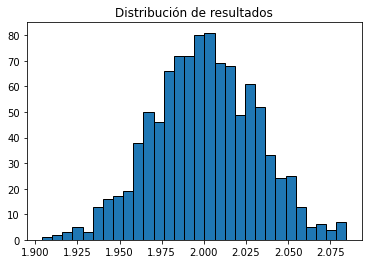

In [3]:
def Gauss(M):#
    Int = [] #Arreglo que guarda los distintos resultados aleatorios de la integración MonteCarlo
    for i in range(M):
        Int.append(MonteCarlo_int(func,1000))#Definimos el tamaño de los muestreos aleatorios suf grande
    return Int

M = 1000 #Definimos suf iteraciones para que se note la forma de la distribución más claramente
x = range(M)

plt.title('Distribución de resultados')   
plt.hist(Gauss(M), bins = 30, ec = 'black')

Aquí visualizamos los resultados de la integral, pero como todos los multiplicamos por el mismo intervalo de dominio, también visualizamos la distribución de los promedios generados. Notamos que esta asemeja una campana de Gauss, y refleja el Teorema del Límite Central revisado en el Marco Teórico. Su media con $N$´s suficientemente grandes es el resultado correcto: $2$.

##Error Asociado

Nos preguntamos ahora, ¿Qué tan buen estimador de $\mu_x = \int_{-\infty}^{\infty} xf(x)dx$  es $\bar{X}$? Revisamos la esperanza de su diferencia.

$$\mathbb{E} (\bar{X}- \mu_x)= \mathbb{E} (\bar{X}) -\mu_x = (\frac{1}{N}\sum_{i=1}^{N} \mathbb{E}(x_i)) -\mu_x $$

Como $\mathbb{E}(x_i) = \mu_x$ la esperanza de la diferencia es 0.

Ahora, su varianza. 

$$var(\bar{X}- \mu_x) = var(\bar{X})- var(\mu_x) $$

Ya que Monte Carlo toma v.a´s independientes, la varianza de la suma es la suma de sus varianzas. Por lo que

$$var(\bar{X}- \mu_x) = \frac{1}{N^2}\sum_{i=1}^{N} var(x_i) = \frac{1}{N^2}N\sigma_x^2 = \frac{\sigma_x^2}{N}$$

La cantidad $\sigma_x$  es conocida como la desviación estándar. Por lo que, el error estándar decrece a razón de $\sqrt{N}$. Es decir, para decrecer la variabilidad en el estimador de la media por un factor de 10 requiere incrementar por un factor de 100 el tamaño de la muestra.

Por el Teorema del Límite Central, $\bar{X}- \mu_x \sim \mathbb{N}(0, \frac{\sigma_x^2}{\sqrt{N}})$

Usaremos esto para visualizar el posible error en nuestra solución. Para ello, tomaremos un intervalo de confianza del $99$%. En caso de la distribución normal, ocurre entre 3 desviaciones estándar. Es decir,

$$\mathbb{P}[-3 \frac{\sigma_x}{\sqrt{N}} <\bar{X}-\mu_x <3\frac{\sigma_x}{\sqrt{N}}] \sim 0.99$$



#Desarrollo

Ahora estamos listos para la implementación combinada de EDO´s e integración Monte Carlo. Consideraremos la forma de EDO:

$$\frac{dx}{dt} = f(t,x(t))$$

con $x(t_0)=x_0$ valor inicial de la ecuación. También utilizaremos el resultado que indica que podemos considerarla de la siguiente forma:

$$x(t) = x_0 + \int_{t_0}^{t} f(s,x(s))ds$$

que discretizamos a pedazos más pequeños, pasando a:

$$x(t) = x_0 + \sum_{i=1}^{N} \int_{t_{i-1}}^{t_i} f(s,x(s))ds$$

Aplicando el Estimador Monte Carlo:

$$x(t) = x_0 + \sum_{i=1}^{N} [ \frac{t_i - t_{i-1}}{k} \sum_{k=1}^{K} f(t_k)]$$

Que puede reescribirse como el proceso iterativo:

$$x(t_i) = x(t_{i-1}) +  \frac{t_i - t_{i-1}}{k} \sum_{k=1}^{K} f(t_k)$$

Que también podemos ver como:

$$x(t_i) = x(t_{i-1}) +  \mathbb{E}_{t \sim \mathbb{U}(t_{i-1},t_i)}[f(t)]$$

Podemos ver que podemos resolver la EDO con una muestra de variables aleatorias distribuidas uniformemente y evaluando la función $f$ en ellas. No necesitamos una malla que se adapte u otro método para estimar el tamaño de los pasos, solo un buen muestreo aleatorio. 

##Implementación

Ahora la resolución de una EDO de primer orden lineal. Recordemos que una EDO de primer orden es aquella donde sólo está presente la primera derivada de $x$.


In [4]:
def mi_ode(func, x0, t, N=1):
    """
    :param func: función del campo gradiente
    :param x0: Valor inicial
    :param t: Dominio de puntos sobre las cuales el campo de func debería ser integrado
    :param N: tamaño de muestra aleatoria
    """
    vals = [x0]
    for lo, hi in zip(t[:-1], t[1:]):
        vals.append(vals[-1] + MonteCarlo_int(func, N, [lo, hi]))
    return vals

#EDO Lineal

def funclin(t):
    return t**3 + 2 * t**2 - 3**t


def analitica(t):
  k = -2-(((-2)**4)/4 + (2/3)*((-2)**3) - (3**(-2)/np.log(3)))
  return (t**4)/4 + (2/3)*(t**3) - (3**t/np.log(3)) +k


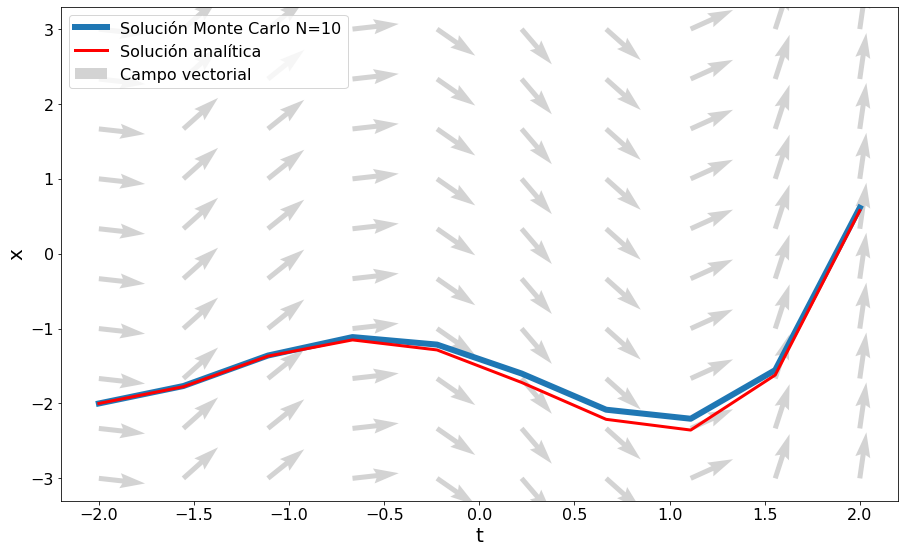

In [5]:
ts = np.linspace(-2.0, 2.0, 10) #establecemos un espacio de tiempo donde queremos ver la solución
x0 = -2.0 #Establecemos condición inicial
xs = [] #Arreglo de arreglos resultado de mi_ode
for i in range(10):
    ans = mi_ode(funclin, x0, ts)
    xs.append(ans)

x_mean = np.mean(xs, axis=0) #Promedio de la columna

#Vamos a cambiar los parámetros de la imagen ya que por default se ve muy pequeña
width = 15
height = width / 1.65
fig = plt.figure(figsize=(width, height))

ys = analitica(ts)

plt.plot(ts, x_mean, linewidth=6, label='Solución Monte Carlo N=10')
plt.plot(ts, ys, linewidth=3, label='Solución analítica', color= 'red')

errorg = []
for i in ts:
  errorg.append(abs(ys-x_mean))


#Vamos a graficar el campo vectorial
tt, xx = np.meshgrid(np.linspace(min(ts), max(ts), 10), np.linspace(-3, 3, 10))
U = 1
V = funclin(tt)
N = np.sqrt(U**2 + V ** 2)
U2, V2 = U/N, V/N
plt.quiver(tt, xx, U2, V2, color='lightgray', label='Campo vectorial')

#Graficamos la solución con el campo vectorial
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'x', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend(loc='upper left', fontsize=16)

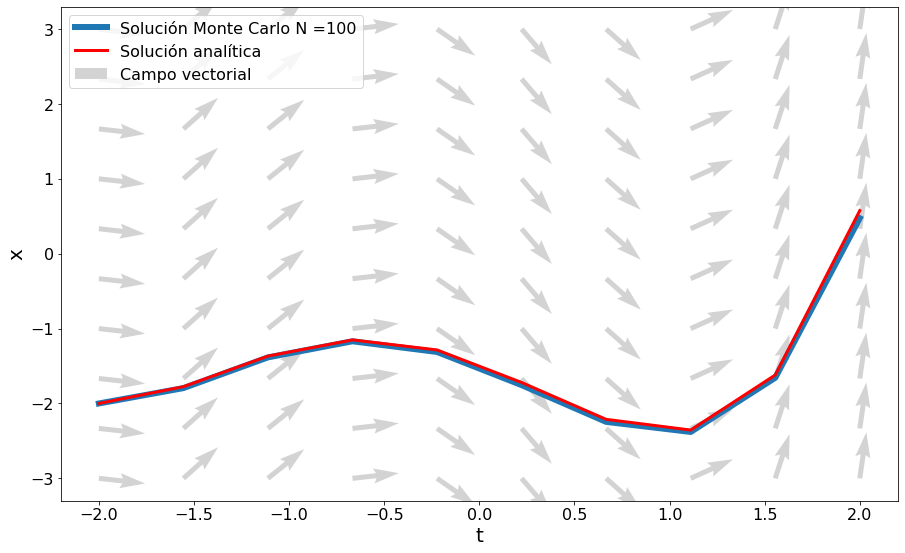

In [6]:
ts = np.linspace(-2.0, 2.0, 10) #establecemos un espacio de tiempo donde queremos ver la solución
x0 = -2.0 #Establecemos condición inicial
xs = [] #Arreglo de arreglos resultado de mi_ode
for i in range(100):
    ans = mi_ode(funclin, x0, ts)
    xs.append(ans)

x_mean = np.mean(xs, axis=0) #Promedio de la columna

#Vamos a cambiar los parámetros de la imagen ya que por default se ve muy pequeña
width = 15
height = width / 1.65
fig = plt.figure(figsize=(width, height))

plt.plot(ts, x_mean, linewidth=6, label='Solución Monte Carlo N =100')
plt.plot(ts, ys, linewidth=3, label='Solución analítica', color= 'red')

errorc = []
for i in ts:
  errorc.append(abs(ys-x_mean))



#Vamos a graficar el campo vectorial
tt, xx = np.meshgrid(np.linspace(min(ts), max(ts), 10), np.linspace(-3, 3, 10))
U = 1
V = funclin(tt)
N = np.sqrt(U**2 + V ** 2)
U2, V2 = U/N, V/N
plt.quiver(tt, xx, U2, V2, color='lightgray', label='Campo vectorial')

#Graficamos la solución con el campo vectorial
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'x', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend(loc='upper left', fontsize=16)

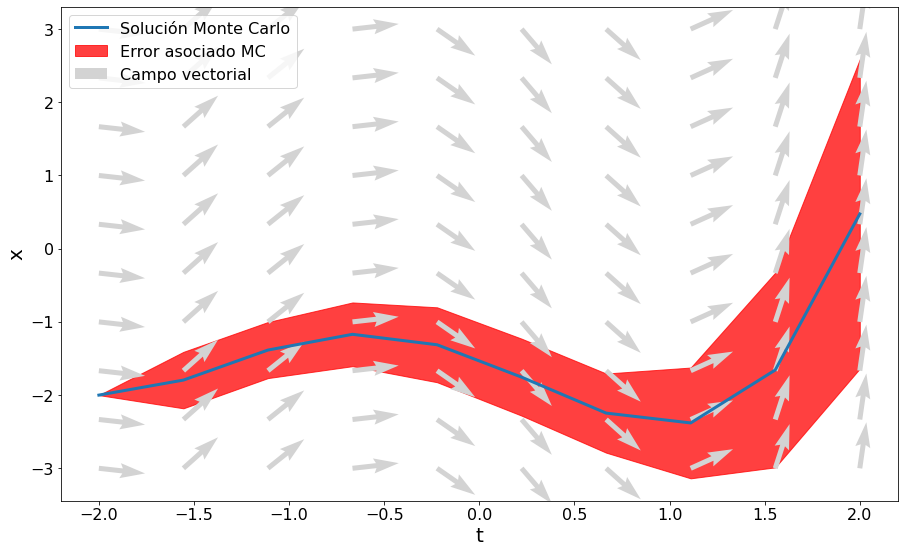

In [7]:
x_std = np.std(xs, axis=0) #Desviación estándar de la columna

#Vamos a cambiar los parámetros de la imagen ya que por default se ve muy pequeña
width = 15
height = width / 1.65
fig = plt.figure(figsize=(width, height))

plt.plot(ts, x_mean, linewidth=3, label='Solución Monte Carlo')
plt.fill_between(ts, x_mean - 3 * x_std, x_mean + 3 * x_std, alpha=.75, color='r', label='Error asociado MC')

#Vamos a graficar el campo vectorial
tt, xx = np.meshgrid(np.linspace(min(ts), max(ts), 10), np.linspace(-3, 3, 10))
U = 1
V = funclin(tt)
N = np.sqrt(U**2 + V ** 2)
U2, V2 = U/N, V/N
plt.quiver(tt, xx, U2, V2, color='lightgray', label='Campo vectorial')

#Graficamos la solución con el campo vectorial y una solución por otro método
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'x', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend(loc='upper left', fontsize=16)

#Análisis de resultados



 

In [8]:
from prettytable import PrettyTable
t = PrettyTable(['Tamaño de Muestra', 'Error máximo', 'Promedio de error'])
t.add_row(['N=10', np.amax(errorc),np.mean(errorc)])
t.add_row(['N=100', np.amax(errorg),np.mean(errorg)])
print(t)

+-------------------+---------------------+---------------------+
| Tamaño de Muestra |     Error máximo    |  Promedio de error  |
+-------------------+---------------------+---------------------+
|        N=10       | 0.10103115235609672 | 0.03143152160199621 |
|       N=100       | 0.15128039784387326 | 0.06285236037821276 |
+-------------------+---------------------+---------------------+


#Conclusiones

1. Para este tipo de problemas la implementación de Monte Carlo resulta muy sencilla gracias a su flexibilidad. 

2. En el caso de la solución de ecuaciones diferenciales no debemos olvidar que el tamaño del intervalo de tiempo y qué tan "fina" hagamos la partición del intervalo  afecta como se comporta la desviación estándar. El resultado es más cercano conforme más fina sea.

3. El método Monte Carlo es computacionalmente más costoso que otros solvers de EDO´s y como todo el proyecto indica que lo fundamental es un muestreo de buen tamaño, preguntarse si vale o no su implementación depende de que tan posible sea otorgárselo.



# Referencias

*  Akhtar, Muhammad Naveed  [et al](http://static.bsu.az/w24/PIAMV4%20N2%202015/6%20Akhtar.pdf). SOLVING INITIAL VALUE ORDINARY DIFFERENTIAL EQUATIONS
BY MONTE CARLO METHOD, Proceedings of IAM, V.4, N.2, 2015, pp.149-174.
* [Teoremas importantes](https://www.ugr.es/~jillana/Docencia/FM/mc.pdf).
* [Monte Carlo Integration](hhttps://inst.eecs.berkeley.edu/~cs294-13/fa09/lectures/scribe-lecture4.pdf).
* [Monte Carlo Estimator](https://cs.dartmouth.edu/wjarosz/publications/dissertation/appendixA.pdf).
*[Error Estimates for MC](https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-90-computational-methods-in-aerospace-engineering-spring-2014/probabilistic-methods-and-optimization/error-estimates-for-the-monte-carlo-method/)
*Otterbach, Johannes. Blog entry : How to Solve ODES with Monte Carlo Method
*N, Metroplis. THE BEGINNING of the
MONTE CARLO METHOD. Los Alamos Science Special issue, 1987, pp.125-130